<a href="https://colab.research.google.com/github/prncrlnd/Test/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [155]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input later (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # Output (3 classes of iris flowers)

  # 4 inputs, two hidden layers, and 3 outputs
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate the nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  # The function to move everything forward
  def forward(self, x):
    x = F.relu(self.fc1(x)) # Rectified Linear Unit
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [156]:
# Pick a manual seed for randomization

torch.manual_seed(32) # 32 is a random number
# Create an instance of the model
model = Model()

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [159]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [160]:
# Change last column from strings to integer
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [161]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1) # Features
y = my_df['species']

In [162]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
# Train Test Split

# Test size will be 20%, Train size will be 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [165]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [166]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [167]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)


In [168]:
# Train our model!
# Epochs? (ione run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the network to find the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.169895887374878
Epoch: 10 and loss: 1.0246273279190063
Epoch: 20 and loss: 0.9455817341804504
Epoch: 30 and loss: 0.8466881513595581
Epoch: 40 and loss: 0.7435370683670044
Epoch: 50 and loss: 0.6060840487480164
Epoch: 60 and loss: 0.4822726547718048
Epoch: 70 and loss: 0.3886190950870514
Epoch: 80 and loss: 0.30829334259033203
Epoch: 90 and loss: 0.23837178945541382


Text(0.5, 0, 'Epoch')

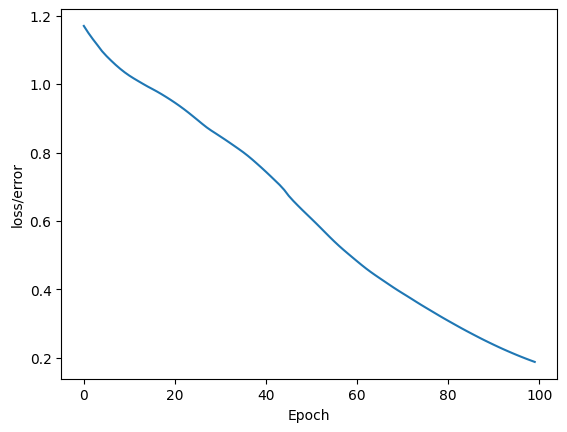

In [169]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [170]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Turns off back progogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [171]:
loss

tensor(0.1677)

In [172]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Tells us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')


1.) tensor([-2.4239,  1.8555,  0.6761]) 	 1 	 1
2.) tensor([ 3.5760, -0.2442, -5.4245]) 	 0 	 0
3.) tensor([ 3.1507, -0.0283, -4.9822]) 	 0 	 0
4.) tensor([-2.3825,  1.9727,  0.4871]) 	 1 	 1
5.) tensor([-4.5079,  1.7650,  2.8035]) 	 2 	 2
6.) tensor([-4.5666,  2.1682,  2.4144]) 	 2 	 2
7.) tensor([ 2.9189,  0.1045, -4.7305]) 	 0 	 0
8.) tensor([ 3.2172, -0.0711, -5.0401]) 	 0 	 0
9.) tensor([-1.9573,  1.9492,  0.0860]) 	 1 	 1
10.) tensor([ 3.4558, -0.1508, -5.3305]) 	 0 	 0
11.) tensor([-2.9269,  2.0270,  1.0101]) 	 1 	 1
12.) tensor([-4.8821,  1.5705,  3.2249]) 	 2 	 2
13.) tensor([-1.8694,  1.6731,  0.3394]) 	 1 	 1
14.) tensor([-1.4232,  1.8993, -0.3955]) 	 1 	 1
15.) tensor([-4.4477,  1.6912,  2.7300]) 	 2 	 2
16.) tensor([-5.1424,  1.3769,  3.6992]) 	 2 	 2
17.) tensor([-2.5044,  1.7918,  0.7836]) 	 1 	 1
18.) tensor([-4.1539,  1.6768,  2.4823]) 	 2 	 2
19.) tensor([-1.6903,  1.8808, -0.0408]) 	 1 	 1
20.) tensor([ 3.6975, -0.1964, -5.6638]) 	 0 	 0
21.) tensor([ 3.3172, -0.0353